In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [2]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [3]:
ds_mnist = tv.datasets.MNIST('C:\\DATA\\DATA_ROOT\\', transform=trans ,download=True)

In [4]:
ds_mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\DATA\DATA_ROOT\
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [5]:
ds_mnist[0][0].shape

torch.Size([1, 28, 28])

In [6]:
ds_mnist[0][0].numpy()[0].shape

(28, 28)

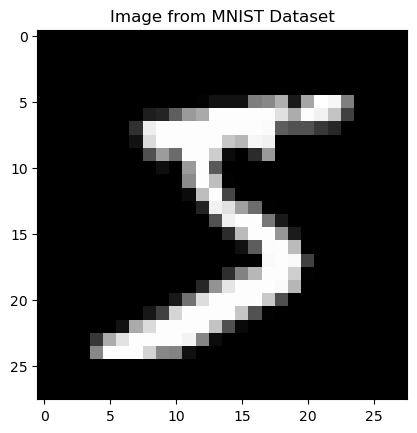

In [7]:
plt.imshow(ds_mnist[0][0].numpy()[0], 'gray');
plt.title('Image from MNIST Dataset');

In [8]:
dataloader = torch.utils.data.DataLoader(ds_mnist, batch_size=16, shuffle=True, num_workers=0,drop_last=True)

In [9]:
for img, label in dataloader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [10]:
class Nueral_numbers(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 200) # Первый слой
        self.linear1_1 = nn.Linear(200, 200) # Второй слой
        self.linear2 = nn.Linear(200, 10) # Последний слой
        self.activation = nn.ReLU() # Активационная функция ReLu
        
    def forward(self, x):
        out = self.flatten(x)
        out = self.linear1(out)
        out = self.activation(out)
        out = self.linear1_1(out)
        out = self.activation(out)
        out = self.linear2(out)
        return out

In [11]:
model = Nueral_numbers()

In [12]:
device = 'cuda'
model = model.to(device)
loss_fn = nn.CrossEntropyLoss().to(device)

In [13]:
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [15]:
def accuracy(prediction, label):
    answer = F.softmax(prediction.detach(),dim=1).numpy().argmax(1) == label.numpy().argmax(1)
#     print(answer)
#     print(answer.sum())
    return answer.mean()

In [16]:
epochs = 5
for epoch in range(epochs):
    x=0
    loss_val = 0
    acc_val = 0
    for img, label in (pbar := tqdm(dataloader)):
        optimizer.zero_grad()
        img = img.to(device)
        
        label = F.one_hot(label, 10).float().to(device)
        label = label.float().to(device)
        prediction = model(img)
        loss = loss_fn(prediction, label)

        loss.backward()
        loss_item = loss.item()
        loss_val += loss.item()
        
        
        optimizer.step()
        acc_current = accuracy(prediction.cpu(), label.cpu())
        acc_val += acc_current
        
        if x==100:
            pbar.set_description(f'loss:{loss_item: .5f}  Accuracy:{acc_current: .3f}')
            x=0
        x+=1
    print("%.3f" % (loss_val/len(dataloader)))
    print("%.3f" % (acc_val/len(dataloader)))

loss: 0.28806  Accuracy: 0.938: 100%|█████████████████████████████████████████████| 3750/3750 [00:15<00:00, 246.45it/s]


0.214
0.935


loss: 0.19134  Accuracy: 0.938: 100%|█████████████████████████████████████████████| 3750/3750 [00:17<00:00, 215.70it/s]


0.093
0.971


loss: 0.00052  Accuracy: 1.000: 100%|█████████████████████████████████████████████| 3750/3750 [00:17<00:00, 209.14it/s]


0.064
0.980


loss: 0.04890  Accuracy: 0.938: 100%|█████████████████████████████████████████████| 3750/3750 [00:16<00:00, 229.99it/s]


0.051
0.983


loss: 0.00015  Accuracy: 1.000: 100%|█████████████████████████████████████████████| 3750/3750 [00:18<00:00, 208.32it/s]

0.039
0.988


In [18]:
accuracy(prediction.cpu(), label.cpu())

1.0

In [19]:
def count_parametrs(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [20]:
count_parametrs(model)

199210